In [1]:
# Import bibliotek i załadowanie danych

In [2]:
import numpy as np 
from numpy import linalg as LA
import pandas as pd 
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.cluster import KMeans
import seaborn as sns;
import os

In [3]:
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        os.path.join(dirname, filename)

data = pd.read_csv (os.path.join(dirname, filename))

In [4]:
# Wstępna analiza danych

In [5]:
# Rodzaj danych
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Kolumny i rekordy
print("Ilość kolumn: {0[1]}, ilość rekordów: {0[0]} ".format(data.shape))

Ilość kolumn: 5, ilość rekordów: 200 


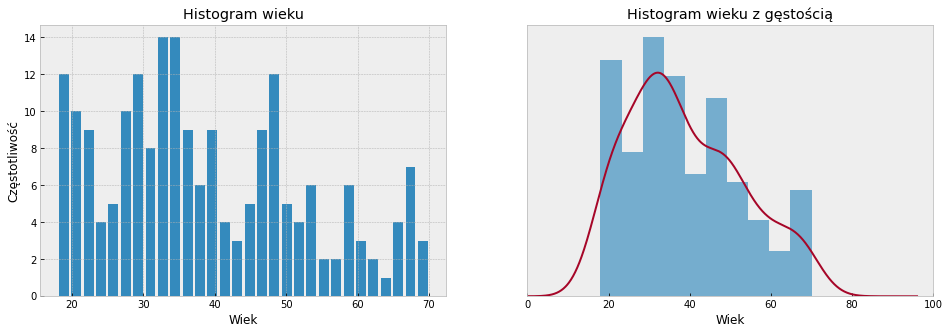

In [7]:
# Histogram: wiek
plt.style.use("bmh")
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

data['Age'].plot(ax=ax[0], kind='hist', bins=30, rwidth=0.8)

ax[0].set_ylabel('Częstotliwość')
ax[0].set_xlabel('Wiek')
ax[0].set_title("Histogram wieku")

data['Age'].plot(ax=ax[1], kind='hist', density=True, alpha=0.65)
data['Age'].plot(ax=ax[1], kind="kde")

ax[1].grid(False)
ax[1].set_xlim(0, 100)
ax[1].set_yticks([])
ax[1].set_ylabel('')
ax[1].set_xlabel('Wiek')
ax[1].set_title("Histogram wieku z gęstością")

plt.show()
fig.savefig("img/histogram_age.pdf")

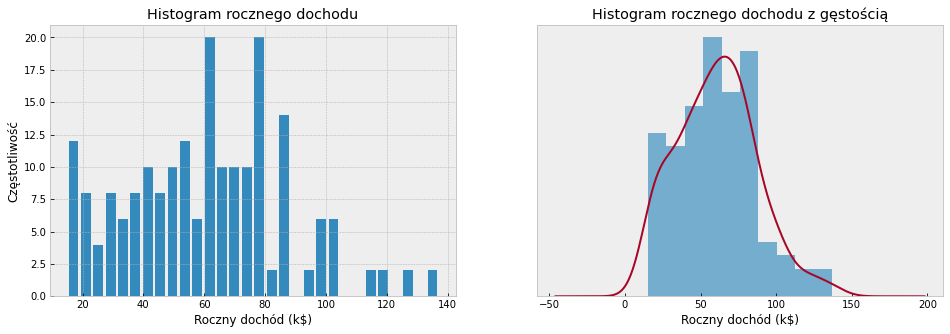

In [8]:
# Histogram: roczny dochód
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

data['Annual Income (k$)'].plot(ax=ax[0], kind='hist', bins=30, rwidth=0.8)

ax[0].set_ylabel('Częstotliwość')
ax[0].set_xlabel('Roczny dochód (k$)')
ax[0].set_title("Histogram rocznego dochodu")

data['Annual Income (k$)'].plot(ax=ax[1], kind='hist', density=True, alpha=0.65)
data['Annual Income (k$)'].plot(ax=ax[1], kind="kde")

ax[1].grid(False)
ax[1].set_yticks([])
ax[1].set_ylabel('')
ax[1].set_xlabel('Roczny dochód (k$)')
ax[1].set_title("Histogram rocznego dochodu z gęstością")

plt.show()
fig.savefig("img/histogram_annual_income.pdf")

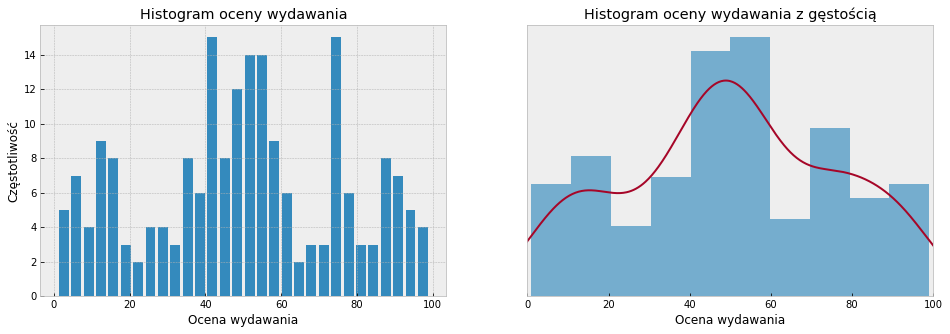

In [9]:
# Histogram: ocena wydawania
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

data['Spending Score (1-100)'].plot(ax=ax[0], kind='hist', bins=30, rwidth=0.8)

ax[0].set_ylabel('Częstotliwość')
ax[0].set_xlabel('Ocena wydawania')
ax[0].set_title("Histogram oceny wydawania")

data['Spending Score (1-100)'].plot(ax=ax[1], kind='hist', density=True, alpha=0.65)
data['Spending Score (1-100)'].plot(ax=ax[1], kind="kde")

ax[1].grid(False)
ax[1].set_xlim(0, 100)
ax[1].set_yticks([])
ax[1].set_ylabel('')
ax[1].set_xlabel('Ocena wydawania')
ax[1].set_title("Histogram oceny wydawania z gęstością")

plt.show()
fig.savefig("img/histogram_spending_score.pdf")

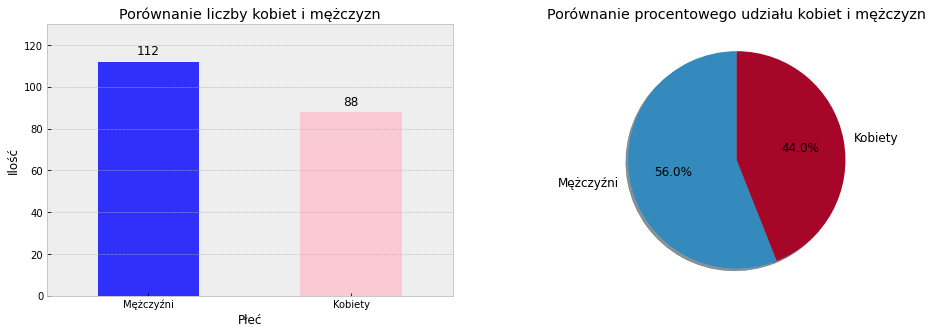

In [10]:
# Wykres: kobiety vs mężczyzni
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

data.groupby('Gender').size().plot(ax=ax[0], kind='bar', color=['blue', 'pink'], alpha=0.8)

ax[0].grid(False, axis='x')
ax[0].set_ylim(0, 130)
ax[0].set_ylabel('Ilość')
ax[0].set_xticklabels(["Mężczyźni", "Kobiety"], rotation = 0)
ax[0].set_xlabel('Płeć')
ax[0].set_title("Porównanie liczby kobiet i mężczyzn")

for index, value in enumerate(list(data['Gender'].value_counts())):
    ax[0].text(index, 0 + value + 5, str(value), horizontalalignment='center', verticalalignment='center', fontsize=12)
    
patches, texts, autotexts = ax[1].pie(data.groupby('Gender').size(), labels=["Mężczyźni", "Kobiety"], autopct='%1.1f%%',shadow=True, startangle=90)
texts[0].set_fontsize(12)
texts[1].set_fontsize(12)
autotexts[0].set_fontsize(12)
autotexts[1].set_fontsize(12)

ax[1].set_title("Porównanie procentowego udziału kobiet i mężczyzn")
    
plt.show()
fig.savefig("img/male_vs_female.pdf")

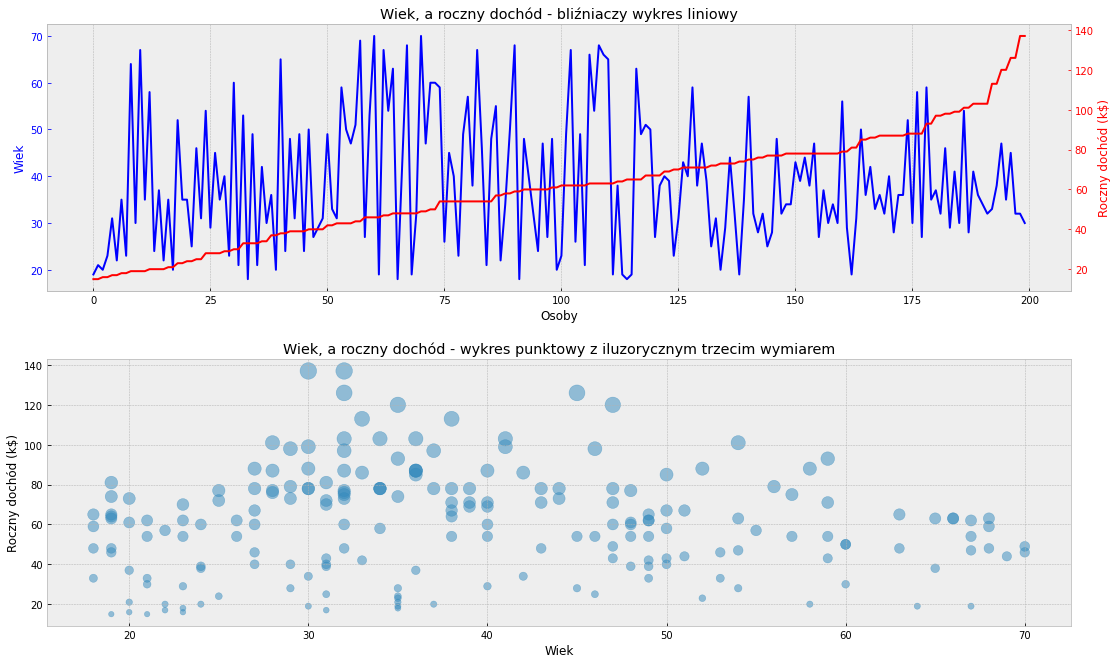

In [11]:
# Wykres: zależność między wiekiem, a rocznymi dochodami
fig, ax = plt.subplots(2, 1, figsize=(16, 10))
fig.tight_layout(pad=5)

twin = ax[0].twinx()

p1 = ax[0].plot(data['Age'], color='b', label='Wiek')
p2 = twin.plot(data['Annual Income (k$)'], color='r', label='Roczny dochód (k$)')

ax[0].grid(False, axis='y')
twin.grid(False, axis='y')
ax[0].yaxis.label.set_color('b')
twin.yaxis.label.set_color('r')
ax[0].tick_params(axis='y', colors='b')
twin.tick_params(axis='y', colors='r')
ax[0].set_xlabel("Osoby")
ax[0].set_ylabel("Wiek")
twin.set_ylabel("Roczny dochód (k$)")
ax[0].set_title("Wiek, a roczny dochód - bliźniaczy wykres liniowy")

ax[1].scatter(data['Age'], data['Annual Income (k$)'], s=data['Annual Income (k$)'] * 2, alpha=0.5)

ax[1].set_xlabel("Wiek")
ax[1].set_ylabel("Roczny dochód (k$)")
ax[1].set_title("Wiek, a roczny dochód - wykres punktowy z iluzorycznym trzecim wymiarem")

plt.show()
fig.savefig("img/age_and_annual_income.pdf")

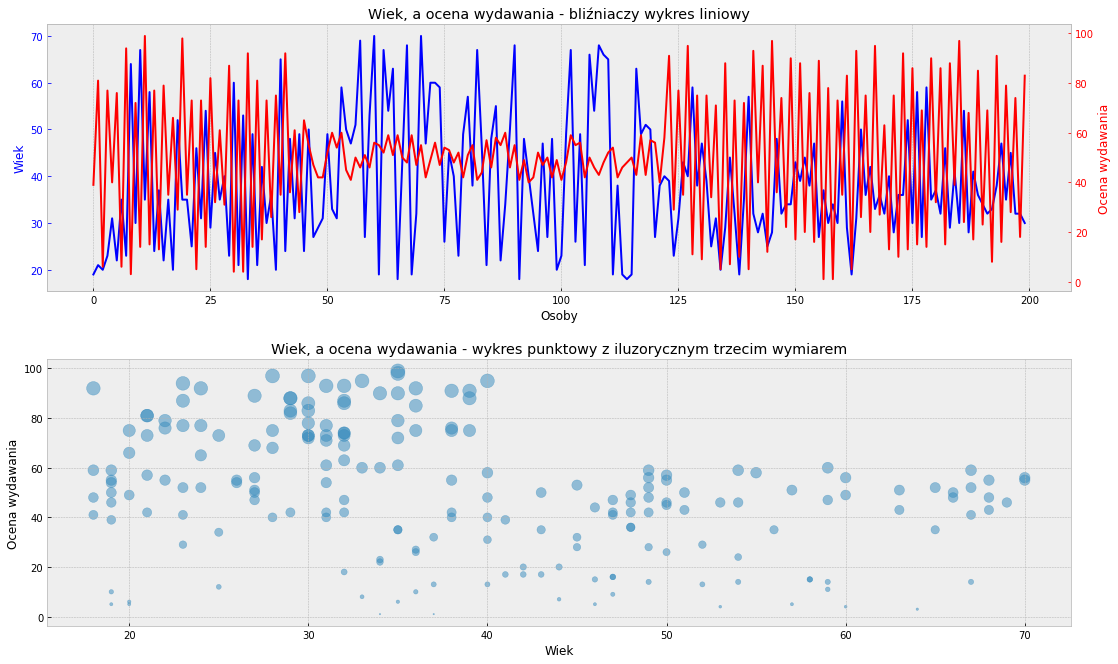

In [12]:
# Wykres: zależność między wiekiem, a oceną wydawania
fig, ax = plt.subplots(2, 1, figsize=(16, 10))
fig.tight_layout(pad=5)

twin = ax[0].twinx()

p1 = ax[0].plot(data['Age'], color='b', label='Wiek')
p2 = twin.plot(data['Spending Score (1-100)'], color='r', label='Ocena wydawania')

ax[0].grid(False, axis='y')
twin.grid(False, axis='y')
ax[0].yaxis.label.set_color('b')
twin.yaxis.label.set_color('r')
ax[0].tick_params(axis='y', colors='b')
twin.tick_params(axis='y', colors='r')
ax[0].set_xlabel("Osoby")
ax[0].set_ylabel("Wiek")
twin.set_ylabel("Ocena wydawania")
ax[0].set_title("Wiek, a ocena wydawania - bliźniaczy wykres liniowy")

ax[1].scatter(data['Age'], data['Spending Score (1-100)'], s=data['Spending Score (1-100)'] * 2, alpha=0.5)

ax[1].set_xlabel("Wiek")
ax[1].set_ylabel("Ocena wydawania")
ax[1].set_title("Wiek, a ocena wydawania - wykres punktowy z iluzorycznym trzecim wymiarem")

plt.show()
fig.savefig("img/age_and_spending_score.pdf")

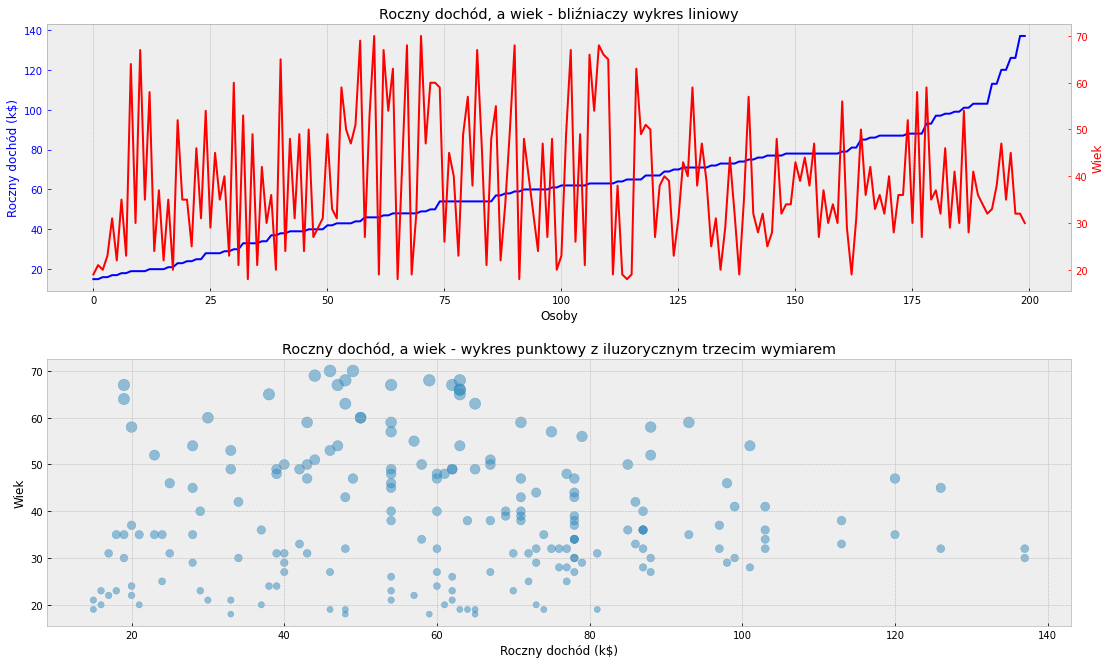

In [13]:
# Wykres: zależność między rocznym dochodem, a wiekiem
fig, ax = plt.subplots(2, 1, figsize=(16, 10))
fig.tight_layout(pad=5)

twin = ax[0].twinx()

p1 = ax[0].plot(data['Annual Income (k$)'], color='b', label='Roczny dochód (k$)')
p2 = twin.plot(data['Age'], color='r', label='Wiek')

ax[0].grid(False, axis='y')
twin.grid(False, axis='y')
ax[0].yaxis.label.set_color('b')
twin.yaxis.label.set_color('r')
ax[0].tick_params(axis='y', colors='b')
twin.tick_params(axis='y', colors='r')
ax[0].set_xlabel("Osoby")
ax[0].set_ylabel("Roczny dochód (k$)")
twin.set_ylabel("Wiek")
ax[0].set_title("Roczny dochód, a wiek - bliźniaczy wykres liniowy")

ax[1].scatter(data['Annual Income (k$)'], data['Age'], s=data['Age'] * 2, alpha=0.5)

ax[1].set_xlabel("Roczny dochód (k$)")
ax[1].set_ylabel("Wiek")
ax[1].set_title("Roczny dochód, a wiek - wykres punktowy z iluzorycznym trzecim wymiarem")

plt.show()
fig.savefig("img/annual_income_and_age.pdf")

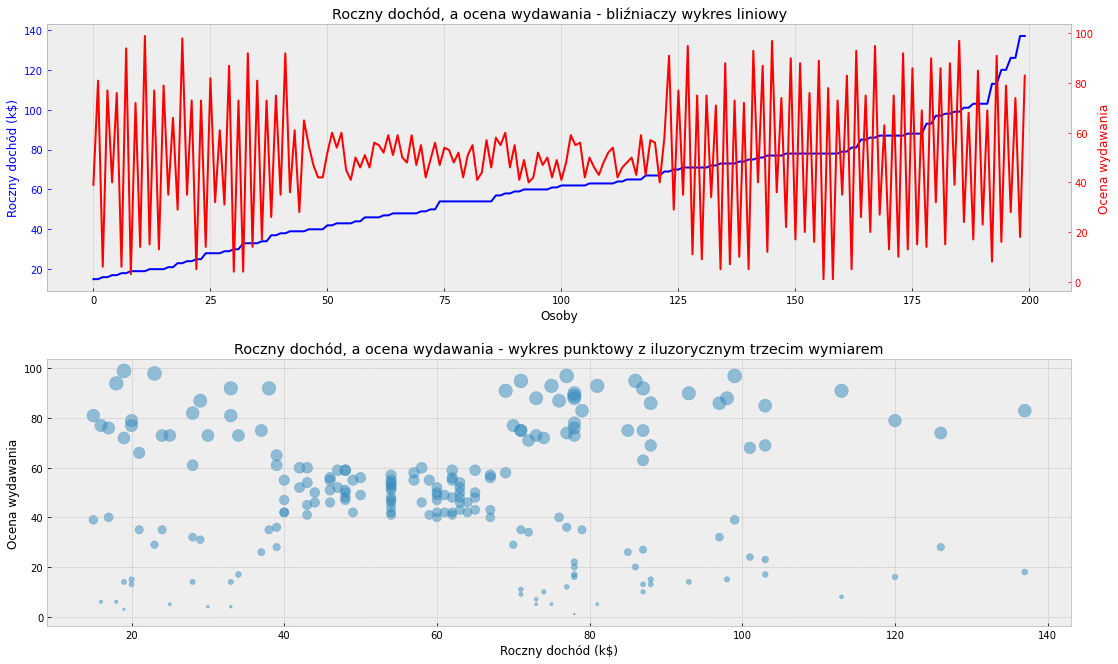

In [14]:
# Wykres: zależność między rocznym dochodem, a oceną wydawania
fig, ax = plt.subplots(2, 1, figsize=(16, 10))
fig.tight_layout(pad=5)

twin = ax[0].twinx()

p1 = ax[0].plot(data['Annual Income (k$)'], color='b', label='Roczny dochód (k$)')
p2 = twin.plot(data['Spending Score (1-100)'], color='r', label='Ocena wydawania')

ax[0].grid(False, axis='y')
twin.grid(False, axis='y')
ax[0].yaxis.label.set_color('b')
twin.yaxis.label.set_color('r')
ax[0].tick_params(axis='y', colors='b')
twin.tick_params(axis='y', colors='r')
ax[0].set_xlabel("Osoby")
ax[0].set_ylabel("Roczny dochód (k$)")
twin.set_ylabel("Ocena wydawania")
ax[0].set_title("Roczny dochód, a ocena wydawania - bliźniaczy wykres liniowy")

ax[1].scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], s=data['Spending Score (1-100)'] * 2, alpha=0.5)

ax[1].set_xlabel("Roczny dochód (k$)")
ax[1].set_ylabel("Ocena wydawania")
ax[1].set_title("Roczny dochód, a ocena wydawania - wykres punktowy z iluzorycznym trzecim wymiarem")

plt.show()
fig.savefig("img/annual_income_and_spending_score.pdf")

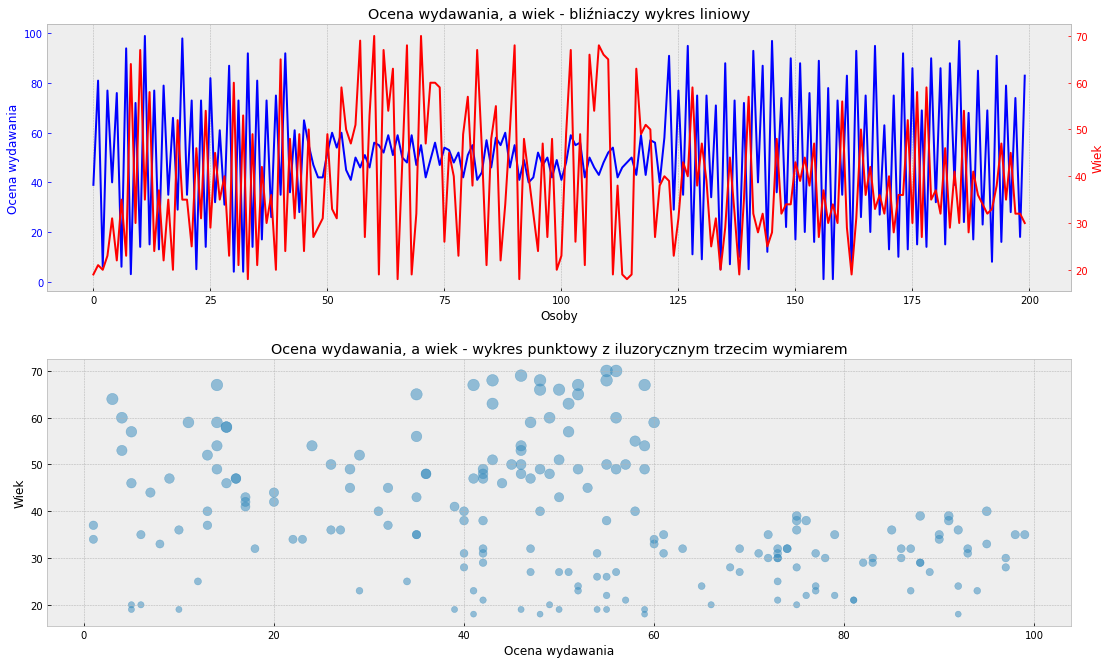

In [15]:
# Wykres: zależność między oceną wydawania, a wiekiem
fig, ax = plt.subplots(2, 1, figsize=(16, 10))
fig.tight_layout(pad=5)

twin = ax[0].twinx()

p1 = ax[0].plot(data['Spending Score (1-100)'], color='b', label='Ocena wydawania')
p2 = twin.plot(data['Age'], color='r', label='Wiek')

ax[0].grid(False, axis='y')
twin.grid(False, axis='y')
ax[0].yaxis.label.set_color('b')
twin.yaxis.label.set_color('r')
ax[0].tick_params(axis='y', colors='b')
twin.tick_params(axis='y', colors='r')
ax[0].set_xlabel("Osoby")
ax[0].set_ylabel("Ocena wydawania")
twin.set_ylabel("Wiek")
ax[0].set_title("Ocena wydawania, a wiek - bliźniaczy wykres liniowy")

ax[1].scatter(data['Spending Score (1-100)'], data['Age'], s=data['Age'] * 2, alpha=0.5)

ax[1].set_xlabel("Ocena wydawania")
ax[1].set_ylabel("Wiek")
ax[1].set_title("Ocena wydawania, a wiek - wykres punktowy z iluzorycznym trzecim wymiarem")

plt.show()
fig.savefig("img/spending_score_and_age.pdf")

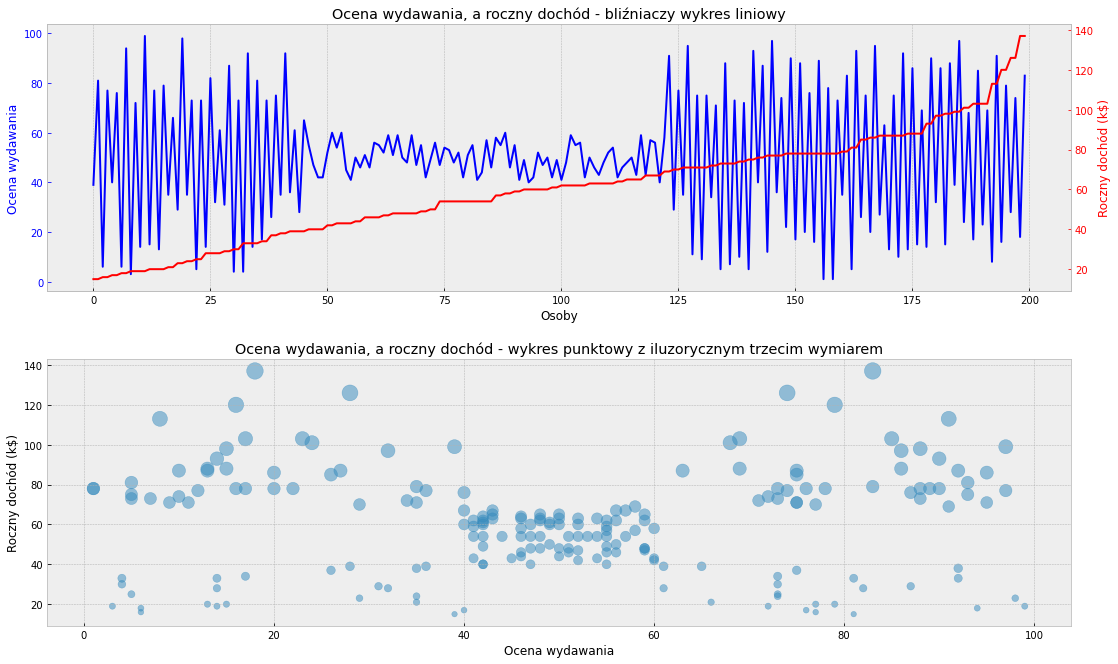

In [16]:
# Wykres: zależność między oceną wydawania, a rocznym dochodem
fig, ax = plt.subplots(2, 1, figsize=(16, 10))
fig.tight_layout(pad=5)

twin = ax[0].twinx()

p1 = ax[0].plot(data['Spending Score (1-100)'], color='b', label='Ocena wydawania')
p2 = twin.plot(data['Annual Income (k$)'], color='r', label='Roczny dochód (k$)')

ax[0].grid(False, axis='y')
twin.grid(False, axis='y')
ax[0].yaxis.label.set_color('b')
twin.yaxis.label.set_color('r')
ax[0].tick_params(axis='y', colors='b')
twin.tick_params(axis='y', colors='r')
ax[0].set_xlabel("Osoby")
ax[0].set_ylabel("Ocena wydawania")
twin.set_ylabel("Roczny dochód (k$)")
ax[0].set_title("Ocena wydawania, a roczny dochód - bliźniaczy wykres liniowy")

ax[1].scatter(data['Spending Score (1-100)'], data['Annual Income (k$)'], s=data['Annual Income (k$)'] * 2, alpha=0.5)

ax[1].set_xlabel("Ocena wydawania")
ax[1].set_ylabel("Roczny dochód (k$)")
ax[1].set_title("Ocena wydawania, a roczny dochód - wykres punktowy z iluzorycznym trzecim wymiarem")

plt.show()
fig.savefig("img/spending_score_and_annual_income.pdf")

In [17]:
# Obróbka danych wymagana do rozpoczęcia procesu klasteryzacji
# Wartości w poszczególnych kolumnch z procentowym udziałem

for column in data.columns.values:
    print('<------------------------------------------------------------>')
    print(data[column].value_counts(normalize=True) * 100)
    print('<------------------------------------------------------------>\n')

<------------------------------------------------------------>
200    0.5
63     0.5
73     0.5
72     0.5
71     0.5
      ... 
131    0.5
130    0.5
129    0.5
128    0.5
1      0.5
Name: CustomerID, Length: 200, dtype: float64
<------------------------------------------------------------>

<------------------------------------------------------------>
Female    56.0
Male      44.0
Name: Gender, dtype: float64
<------------------------------------------------------------>

<------------------------------------------------------------>
32    5.5
35    4.5
19    4.0
31    4.0
30    3.5
49    3.5
27    3.0
47    3.0
40    3.0
23    3.0
36    3.0
38    3.0
50    2.5
48    2.5
29    2.5
21    2.5
20    2.5
34    2.5
18    2.0
28    2.0
59    2.0
24    2.0
67    2.0
54    2.0
39    1.5
25    1.5
33    1.5
22    1.5
37    1.5
43    1.5
68    1.5
45    1.5
46    1.5
60    1.5
41    1.0
57    1.0
66    1.0
65    1.0
63    1.0
58    1.0
26    1.0
70    1.0
42    1.0
53    1.0
52    1.0
51    1

In [18]:
# Usunięcie zbędnej kolumny {CustomerID} zawierającej niepotrzebne do klasteryzacji indeksy
data = data.drop('CustomerID', axis='columns')
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [19]:
# Sprawdzenie czy poszczególne kolumny nie zawierają błędnych danych
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [20]:
# Normalizacja kolumny {Gender} na wartości liczbowe (0/1)
le = preprocessing.LabelEncoder()
age_encd = le.fit_transform(data['Gender'])
print(age_encd)
data['Gender'] = age_encd

[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


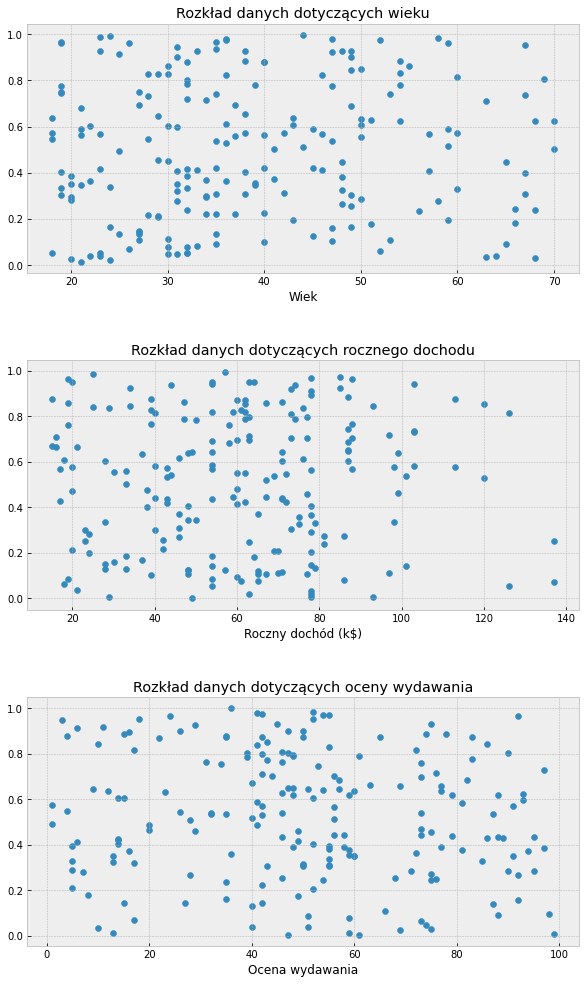

In [21]:
# Wyszukanie danych wymagających standaryzacji lub modyfikacji
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
fig.tight_layout(pad=7)

ax[0].scatter(data['Age'], np.random.rand(data.shape[0]))

ax[0].set_title("Rozkład danych dotyczących wieku")
ax[0].set_xlabel("Wiek")

ax[1].scatter(data['Annual Income (k$)'], np.random.rand(data.shape[0]))

ax[1].set_title("Rozkład danych dotyczących rocznego dochodu")
ax[1].set_xlabel("Roczny dochód (k$)")

ax[2].scatter(data['Spending Score (1-100)'], np.random.rand(data.shape[0]))

ax[2].set_title("Rozkład danych dotyczących oceny wydawania")
ax[2].set_xlabel("Ocena wydawania")

plt.show()
fig.savefig("img/data_distribution.pdf")

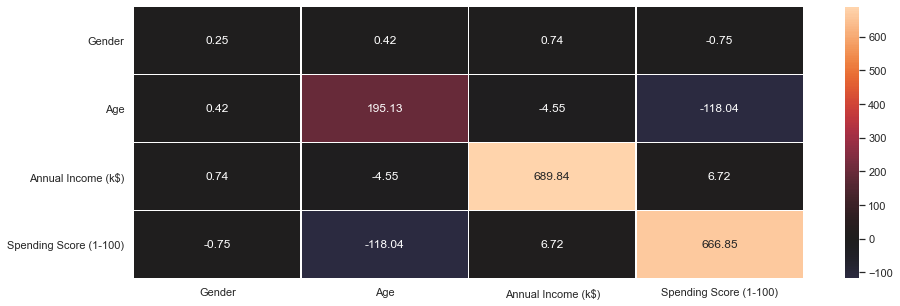

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,0.247638,0.423116,0.737286,-0.746734
Age,0.423116,195.133166,-4.548744,-118.040201
Annual Income (k$),0.737286,-4.548744,689.835578,6.716583
Spending Score (1-100),-0.746734,-118.040201,6.716583,666.854271


In [22]:
# Macierze: kowariancji (wykres i tabela)
sns.set_theme()

fig, ax = plt.subplots(figsize=(15, 5))

ax = sns.heatmap(data.cov(), center=0, annot=True, fmt='.2f', linewidths=.5)
ax.set_xticklabels(["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"], rotation = 0)

plt.show()
fig.savefig("img/covariance_matrix_plot.pdf")

data.cov()

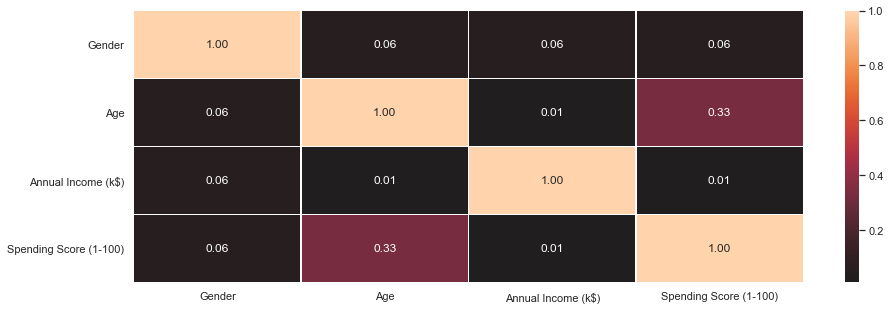

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,0.058109
Age,0.060867,1.000000,0.012398,0.327227
Annual Income (k$),0.056410,0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,0.327227,0.009903,1.000000


In [23]:
# Macierze: korelacji (wykres i tabela)
fig, ax = plt.subplots(figsize=(15, 5))

ax = sns.heatmap(data.corr().abs(), center=0, annot=True, fmt='.2f', linewidths=.5)
ax.set_xticklabels(["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"], rotation = 0)

plt.show()
fig.savefig("img/correlation_matrix_plot.pdf")

data.corr().abs()

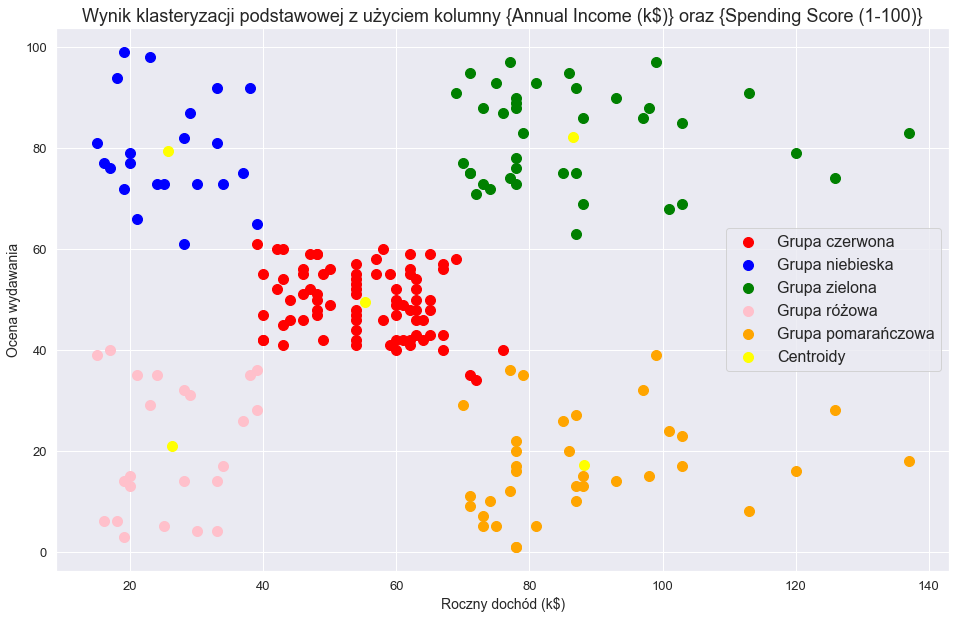

In [24]:
# Wykres: Wynik klasteryzacji podstawowej dla dwóch kolumn
new = data[['Annual Income (k$)', 'Spending Score (1-100)']].to_numpy()

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(new)

fig, ax = plt.subplots(figsize=(16, 10))

ax.scatter(new[y_kmeans == 0, 0], new[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Grupa czerwona')
ax.scatter(new[y_kmeans == 1, 0], new[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Grupa niebieska')
ax.scatter(new[y_kmeans == 2, 0], new[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Grupa zielona')
ax.scatter(new[y_kmeans == 3, 0], new[y_kmeans == 3, 1], s = 100, c = 'pink', label = 'Grupa różowa')
ax.scatter(new[y_kmeans == 4, 0], new[y_kmeans == 4, 1], s = 100, c = 'orange', label = 'Grupa pomarańczowa')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroidy')

ax.legend(prop={'size': 16})
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_ylabel("Ocena wydawania", fontsize=14)
ax.set_xlabel("Roczny dochód (k$)", fontsize=14)
ax.set_title("Wynik klasteryzacji podstawowej z użyciem kolumny {Annual Income (k$)} oraz {Spending Score (1-100)}", fontsize=18)

plt.show()
fig.savefig("img/basic_clustering.pdf")

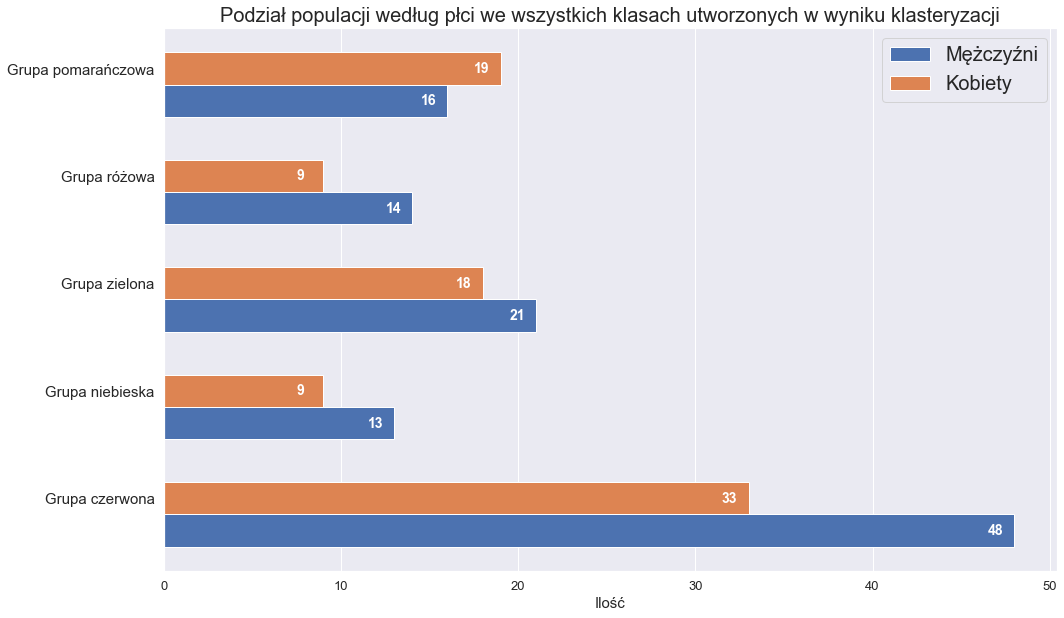

In [25]:
# Wykres: Podział populacji według płci we wszystkich klasach utworzonych w wyniku klasteryzacji
result = {}
for gender, group in list(zip(data['Gender'], y_kmeans)):
    group_data = result.setdefault(group, {})
    group_data.setdefault(gender, 0)
    group_data[gender] += 1

labels = ['Grupa czerwona', 'Grupa niebieska', 'Grupa zielona', 'Grupa różowa', 'Grupa pomarańczowa']
men = [result.get(key).get(0) for key in sorted(result)]
women = [result.get(key).get(1) for key in sorted(result)]

fig, ax = plt.subplots(figsize=(16, 10))

width = 0.3
ind = np.arange(len(labels))

rects1 = ax.barh(ind - width/2, men, width, label='Mężczyźni')
rects2 = ax.barh(ind + width/2, women, width, label='Kobiety')
plt.title('Podział populacji według płci we wszystkich klasach utworzonych w wyniku klasteryzacji', fontsize=20)
plt.xlabel('Ilość', fontsize=15)
ax.set_yticks(ind+width/2)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_yticklabels(labels, minor=False, fontsize=15)
ax.legend(prop={'size': 20})
ax.grid(False, axis='y')

for i, (v1, v2) in enumerate(zip(men, women)):
    ax.text(v1 - 1.5, i, '\n\n' + str(round(v1, 2)), color='white', fontweight='bold', fontsize=14, verticalalignment='center')    
    ax.text(v2 - 1.5, i, str(round(v2, 2)) + '\n\n', color='white', fontweight='bold', fontsize=14, verticalalignment='center')    

plt.show()
fig.savefig("img/men_vs_women.pdf")

In [26]:
# Sprawdzanie wszystkich wariantów redukcji wymiarów
for i in range(len(data.columns)):
    pca = decomposition.PCA(n_components=i + 1)
    pca.fit(data)
    Y = pca.transform(data)
    print('Liczba wymiarów:', i + 1)
    print('\tWariacja każdego z wymiarów:', pca.explained_variance_ratio_)
    print('\tPoziom wariancji (strata informacji):', round(sum(list(pca.explained_variance_ratio_))*100, 2), '%\n')

Liczba wymiarów: 1
	Wariacja każdego z wymiarów: [0.45118077]
	Poziom wariancji (strata informacji): 45.12 %

Liczba wymiarów: 2
	Wariacja każdego z wymiarów: [0.45118077 0.44091539]
	Poziom wariancji (strata informacji): 89.21 %

Liczba wymiarów: 3
	Wariacja każdego z wymiarów: [0.45118077 0.44091539 0.10774566]
	Poziom wariancji (strata informacji): 99.98 %

Liczba wymiarów: 4
	Wariacja każdego z wymiarów: [4.51180770e-01 4.40915393e-01 1.07745663e-01 1.58174873e-04]
	Poziom wariancji (strata informacji): 100.0 %



In [27]:
# Poszukiwanie kolumn, które posiadają najwięcej informacji
np.set_printoptions(formatter={'float_kind':"{:.2f}".format})

data_np = data.to_numpy()
cov = np.cov(data_np.T)
w, v = LA.eig(cov)

for idx, val in enumerate(zip(data.columns, w, v)):
    print('Kolumna:', val[0])
    print('\tWariancja:', cov[idx][idx])
    print('\tWartość własna:', val[1])
    print('\tWektor:', val[2], '\n')

Kolumna: Gender
	Wariancja: 0.24763819095477396
	Wartość własna: 0.24549857825121535
	Wektor: [1.00 -0.00 -0.00 -0.00] 

Kolumna: Age
	Wariancja: 195.1331658291457
	Wartość własna: 167.22888103525213
	Wektor: [-0.00 -0.97 -0.13 -0.19] 

Kolumna: Annual Income (k$)
	Wariancja: 689.8355778894472
	Wartość własna: 684.3318413395426
	Wektor: [-0.00 -0.01 -0.81 0.59] 

Kolumna: Spending Score (1-100)
	Wariancja: 666.8542713567839
	Wartość własna: 700.2644323132857
	Wektor: [0.00 -0.23 0.57 0.79] 



        Gender       Age  Annual Income (k$)  Spending Score (1-100)
PC-1 -0.000333 -0.188977            0.588623                0.786009
PC-2  0.001579  0.130961            0.808388               -0.573895


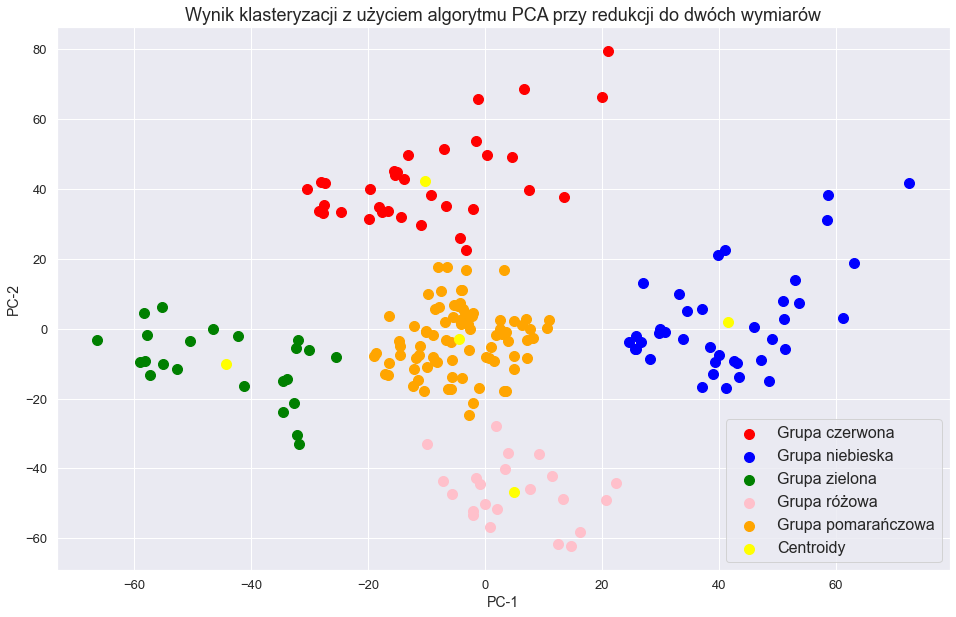

In [28]:
# Wykres: Wynik klasteryzacji z użyciem algorytmu PCA przy redukcji do dwóch wymiarów
pca = decomposition.PCA(n_components=2)
reduced = pca.fit_transform(data)

print(pd.DataFrame(pca.components_,columns=data.columns,index = ['PC-1','PC-2']))

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(reduced)

fig, ax = plt.subplots(figsize=(16, 10))

ax.scatter(reduced[y_kmeans == 0, 0], reduced[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Grupa czerwona')
ax.scatter(reduced[y_kmeans == 1, 0], reduced[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Grupa niebieska')
ax.scatter(reduced[y_kmeans == 2, 0], reduced[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Grupa zielona')
ax.scatter(reduced[y_kmeans == 3, 0], reduced[y_kmeans == 3, 1], s = 100, c = 'pink', label = 'Grupa różowa')
ax.scatter(reduced[y_kmeans == 4, 0], reduced[y_kmeans == 4, 1], s = 100, c = 'orange', label = 'Grupa pomarańczowa')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroidy')

ax.legend(prop={'size': 16}, loc='lower right')
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_xlabel("PC-1", fontsize=14)
ax.set_ylabel("PC-2", fontsize=14)
ax.set_title("Wynik klasteryzacji z użyciem algorytmu PCA przy redukcji do dwóch wymiarów", fontsize=18)

plt.show()
fig.savefig("img/pca_clustering.pdf")